In [2]:
# import the necessary packages for SQL server connection
import os
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Def function to connect with sql server using pyodbc and query data
def query_data(query,database):
    r"""
    Function to query data from a SQL database
    :param query: 
    :param database: 
    :return: pd.DataFrame
    
        Connection parameters:
        - user: voliveira
        - password: (get password from environment variable SQL_PASSWORD)
        - host: ROMPETECHOS\REPLICA
        - port: 53373
    """
    # Create the connection string
    user = 'voliveira'
    password = os.environ.get('SQL_PASSWORD')
    host = r'ROMPETECHOS'
    instance = 'REPLICA'
    port = '53373'
    conn_str = f"DRIVER=SQL Server;SERVER={host}\\{instance},{port};DATABASE={database};UID={user};PWD={password}"

    # Create the connection
    try:
        conn = pyodbc.connect(conn_str)
    except Exception as e:
        print(f'Error creating connection: {e}')
        return None
    
    # query the data
    try:
        data = pd.read_sql(query, conn)
    except Exception as e:
        print(f'Error: {e}')
        data = None
        
    return data

# Load and Pre-process Data

In [82]:
# Query data from the database
cabe_airzone = query_data(f'SELECT * FROM dbo.CABEALBV','Airzone')
lin_airzone = query_data(f'SELECT * FROM dbo.LINEALBA','Airzone')
cabe_airzone_france = query_data(f'SELECT * FROM dbo.CABEALBV','AirzoneFrance')
lin_airzone_france = query_data(f'SELECT * FROM dbo.LINEALBA','AirzoneFrance')
cabe_airzone_italia = query_data(f'SELECT * FROM dbo.CABEALBV','AirzoneItalia')
lin_airzone_italia = query_data(f'SELECT * FROM dbo.LINEALBA','AirzoneItalia')
cabe_airzone_usa = query_data(f'SELECT * FROM dbo.CABEALBV','AirzoneUsa')
lin_airzone_usa = query_data(f'SELECT * FROM dbo.LINEALBA','AirzoneUsa')
cabe_airzone_altra = query_data(f'SELECT * FROM dbo.CABEALBV','Altra')
lin_airzone_altra = query_data(f'SELECT * FROM dbo.LINEALBA','Altra')

C:\Users\voliveira\AppData\Local\Temp\ipykernel_12576\1376484185.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


KeyboardInterrupt: 

In [ ]:
# Add one column to each dataframe to identify the country
cabe_airzone['Country'] = 'Spain'
cabe_airzone_france['Country'] = 'France'
cabe_airzone_italia['Country'] = 'Italia'
cabe_airzone_usa['Country'] = 'USA'
cabe_airzone_altra['Country'] = 'Altra'

In [ ]:
# Add month and year colulmns based on FECHA to cabe dataframes
cabe_airzone['FECHA'] = pd.to_datetime(cabe_airzone['FECHA'])
cabe_airzone['Month'] = cabe_airzone['FECHA'].dt.month
cabe_airzone['Year'] = cabe_airzone['FECHA'].dt.year
cabe_airzone_france['FECHA'] = pd.to_datetime(cabe_airzone_france['FECHA'])
cabe_airzone_france['Month'] = cabe_airzone_france['FECHA'].dt.month
cabe_airzone_france['Year'] = cabe_airzone_france['FECHA'].dt.year
cabe_airzone_italia['FECHA'] = pd.to_datetime(cabe_airzone_italia['FECHA'])
cabe_airzone_italia['Month'] = cabe_airzone_italia['FECHA'].dt.month
cabe_airzone_italia['Year'] = cabe_airzone_italia['FECHA'].dt.year
cabe_airzone_usa['FECHA'] = pd.to_datetime(cabe_airzone_usa['FECHA'])
cabe_airzone_usa['Month'] = cabe_airzone_usa['FECHA'].dt.month
cabe_airzone_usa['Year'] = cabe_airzone_usa['FECHA'].dt.year
cabe_airzone_altra['FECHA'] = pd.to_datetime(cabe_airzone_altra['FECHA'])
cabe_airzone_altra['Month'] = cabe_airzone_altra['FECHA'].dt.month
cabe_airzone_altra['Year'] = cabe_airzone_altra['FECHA'].dt.year

In [100]:
# Check if the dataframes has the same columns
# Print the columns that are in cabe_airzone but that are not in cabe_airzone_france
print('Columns in cabe_airzone that are not in cabe_airzone_france:')
print(set(cabe_airzone.columns) - set(cabe_airzone_france.columns))
print('Columns in cabe_airzone_italia that are not in cabe_airzone_france:')
print(set(cabe_airzone_france.columns) - set(cabe_airzone_italia.columns))
print('Columns in cabe_airzone_usa that are not in cabe_airzone_italia:')
print(set(cabe_airzone_italia.columns) - set(cabe_airzone_usa.columns))
print('Columns in cabe_airzone_altra that are not in cabe_airzone_usa:')
print(set(cabe_airzone_usa.columns) - set(cabe_airzone_altra.columns))
print('Columns in cabe_airzone_usa that are not in cabe_airzone_altra:')
print(set(cabe_airzone_altra.columns) - set(cabe_airzone_usa.columns))

Columns in cabe_airzone that are not in cabe_airzone_france:
set()
Columns in cabe_airzone_italia that are not in cabe_airzone_france:
set()
Columns in cabe_airzone_usa that are not in cabe_airzone_italia:
set()
Columns in cabe_airzone_altra that are not in cabe_airzone_usa:
set()
Columns in cabe_airzone_usa that are not in cabe_airzone_altra:
{'ITA_NUMDOC', 'TIPOCONT', 'IDTOT', 'ITA_CLIENTE_ENVIO'}


In [103]:
# Concat all cabe and lin dataframes
cabe = pd.concat([cabe_airzone,cabe_airzone_france,cabe_airzone_italia,cabe_airzone_usa,cabe_airzone_altra])
lineas = pd.concat([lin_airzone,lin_airzone_france,lin_airzone_italia,lin_airzone_usa,lin_airzone_altra])

In [106]:
# Clean SERIES field
cabe['SERIE'] = cabe['SERIE'].str.strip()

In [104]:
cabe.describe(include='all')

,BASE,BASEBRUTA,BASEBRUTAIVA1,BASEBRUTAMONEDA,BASEMONEDA,BASEPOR,BASEPORMONEDA,CAMBIO,CODALM,CODCLI,...,AZ_VOLUMEN,DESC_GASTOS_ENVIO,ERROR_POSTVENTA,TRA_FACTURA_DIGITAL,TRA_PORTES_MANUAL,Country,IDTOT,TIPOCONT,ITA_CLIENTE_ENVIO,ITA_NUMDOC
count,2.492780e+05,2.492780e+05,2.492780e+05,2.492780e+05,2.492780e+05,249278.000000,249278.000000,249278.000000,249278,249278,...,1.509430e+05,150944.0,31424,150945,150944,249278,3.202400e+04,32024,32024,32024
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4284,...,NaN,NaN,65,2,2,5,NaN,1,649,2361
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6,...,NaN,NaN,3.08,F,F,Spain,NaN,1,,
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205777,21091,...,NaN,NaN,12849,150930,150930,116949,NaN,32024,29557,29581
mean,1.535649e+03,1.531840e+03,1.531822e+03,1.532912e+03,1.536744e+03,4.051430,4.074081,0.999654,NaN,NaN,...,1.590004e-08,0.0,NaN,NaN,NaN,NaN,6.370926e+07,NaN,NaN,NaN
min,-1.160069e+05,-1.160069e+05,-1.160069e+05,-1.160069e+05,-1.160069e+05,0.000000,0.000000,0.635000,NaN,NaN,...,0.000000e+00,0.0,NaN,NaN,NaN,NaN,3.289310e+07,NaN,NaN,NaN
25%,1.533600e+02,1.465000e+02,1.465000e+02,1.465000e+02,1.533800e+02,0.000000,0.000000,1.000000,NaN,NaN,...,0.000000e+00,0.0,NaN,NaN,NaN,NaN,4.916069e+07,NaN,NaN,NaN
50%,6.467500e+02,6.448000e+02,6.447850e+02,6.449300e+02,6.468600e+02,0.000000,0.000000,1.000000,NaN,NaN,...,0.000000e+00,0.0,NaN,NaN,NaN,NaN,6.473626e+07,NaN,NaN,NaN
75%,1.383067e+03,1.382023e+03,1.382000e+03,1.382023e+03,1.383067e+03,0.000000,0.000000,1.000000,NaN,NaN,...,0.000000e+00,0.0,NaN,NaN,NaN,NaN,7.836385e+07,NaN,NaN,NaN
max,1.538019e+06,1.538019e+06,1.538019e+06,1.538019e+06,1.538019e+06,22000.000000,22000.000000,1.174100,NaN,NaN,...,2.400000e-03,0.0,NaN,NaN,NaN,NaN,9.070579e+07,NaN,NaN,NaN


In [134]:
lineas.describe(include='all')

,BASEMONEDA,BRUTOMONEDA,CODALM,CODART,CODREP,CODREP2,CODREP3,DESC1,DESCLIN,ESCOMPONENTE,...,CODTALLAV,COSTEADIC,DESC2,DESC3,DESC4,FECCADUC,IDTOT,LOTE,OBTPRCCOSTE,UBICACION
count,1.429729e+07,1.429729e+07,14297287,14297287,7101280,909149,49047,1.429729e+07,14297287,14297287,...,0,3.540794e+06,4834076.0,4834076.0,4834076.0,4834076,4.834076e+06,4834076,1293282,0
unique,NaN,NaN,22,16135,136,49,13,NaN,36747,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
top,NaN,NaN,1,CADM200ION,1,70,2,NaN,COMPUERTA MOTORIZADA 200 EASYZONE CON IONIZACI...,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,PEST,NaN
freq,NaN,NaN,9389499,926842,673534,253912,24940,NaN,926832,11123224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4834076,1293282,NaN
mean,9.535837e+01,1.781145e+02,NaN,NaN,NaN,NaN,NaN,3.862029e+01,NaN,NaN,...,NaN,2.632178e-04,0.0,0.0,0.0,1899-12-29 23:59:59.999964928,6.919761e+07,NaN,NaN,NaN
min,-1.160069e+05,-1.160069e+05,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,NaN,...,NaN,0.000000e+00,0.0,0.0,0.0,1899-12-30 00:00:00,3.292867e+07,NaN,NaN,NaN
25%,1.622000e+01,3.124000e+01,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,...,NaN,0.000000e+00,0.0,0.0,0.0,1899-12-30 00:00:00,6.012503e+07,NaN,NaN,NaN
50%,4.823000e+01,9.389000e+01,NaN,NaN,NaN,NaN,NaN,4.800000e+01,NaN,NaN,...,NaN,0.000000e+00,0.0,0.0,0.0,1899-12-30 00:00:00,7.058405e+07,NaN,NaN,NaN
75%,9.000000e+01,1.800000e+02,NaN,NaN,NaN,NaN,NaN,5.500000e+01,NaN,NaN,...,NaN,0.000000e+00,0.0,0.0,0.0,1899-12-30 00:00:00,8.058200e+07,NaN,NaN,NaN
max,3.639600e+05,3.639600e+05,NaN,NaN,NaN,NaN,NaN,1.000000e+02,NaN,NaN,...,NaN,2.330000e+02,0.0,0.0,0.0,1899-12-30 00:00:00,9.070608e+07,NaN,NaN,NaN


In [107]:
cabe['SERIE'].unique()

array(['3', '4', '1', '2', '6', '7', 'FR', 'FA', 'FM', 'FV', None, 'V',
       'C', '8', 'A'], dtype=object)

In [108]:
# Define some constants
SALES_CODES = ['1','2','C','FA','A']
AFTER_SALES_CODE = ['3','6','FR','FV']

In [109]:
# Check the variables in memory
import sys
def get_size(obj):
    return sys.getsizeof(obj)
variables = globals().copy()
for name, var in variables.items():
    print(f"{name}: {get_size(var)} bytes")

__name__: 49 bytes
__doc__: 105 bytes
__package__: 16 bytes
__loader__: 16 bytes
__spec__: 16 bytes
__builtin__: 72 bytes
__builtins__: 72 bytes
_ih: 1080 bytes
_oh: 632 bytes
_dh: 64 bytes
In: 1080 bytes
Out: 632 bytes
get_ipython: 64 bytes
exit: 48 bytes
quit: 48 bytes
open: 160 bytes
_: 232 bytes
__: 232 bytes
___: 22816 bytes
__session__: 54 bytes
_i: 140 bytes
_ii: 63 bytes
_iii: 103 bytes
_i1: 228 bytes
create_engine: 160 bytes
pd: 72 bytes
plt: 72 bytes
np: 72 bytes
sns: 72 bytes
sys: 72 bytes
remove_imported_pydev_package: 160 bytes
_pydevd_bundle: 72 bytes
pydev_jupyter_vars: 72 bytes
_i2: 238 bytes
os: 72 bytes
_i3: 910 bytes
query_data: 160 bytes
_i4: 911 bytes
_i5: 911 bytes
_i6: 912 bytes
_i7: 107 bytes
cabe_airzone: 297929900 bytes
_i8: 1021 bytes
_i9: 107 bytes
_i10: 1168 bytes
_i11: 1170 bytes
_i12: 107 bytes
_i13: 1133 bytes
_i14: 107 bytes
_i15: 1132 bytes
_i16: 107 bytes
_i17: 71 bytes
_17: 54 bytes
_i18: 113 bytes
_i19: 1132 bytes
_i20: 113 bytes
_i21: 1151 bytes
_i

In [ ]:
# Clean memory
del cabe_airzone, lin_airzone, cabe_airzone_france, lin_airzone_france, cabe_airzone_italia, lin_airzone_italia, cabe_airzone_usa, lin_airzone_usa, cabe_airzone_altra, lin_airzone_altra

# Cabecera's analysis

In [136]:
"""# Add year and month columns based on FECHA to cabe dataframe
cabe['FECHA'] = pd.to_datetime(cabe['FECHA'])
cabe['Month'] = cabe['FECHA'].dt.month
cabe['Year'] = cabe['FECHA'].dt.year"""

In [137]:
cabe_sales = cabe[cabe['SERIE'].isin(SALES_CODES)] # Filter the data to get only the sales data
cabe_after_sales = cabe[cabe['SERIE'].isin(AFTER_SALES_CODE)] # Filter the data to get only the after sales data

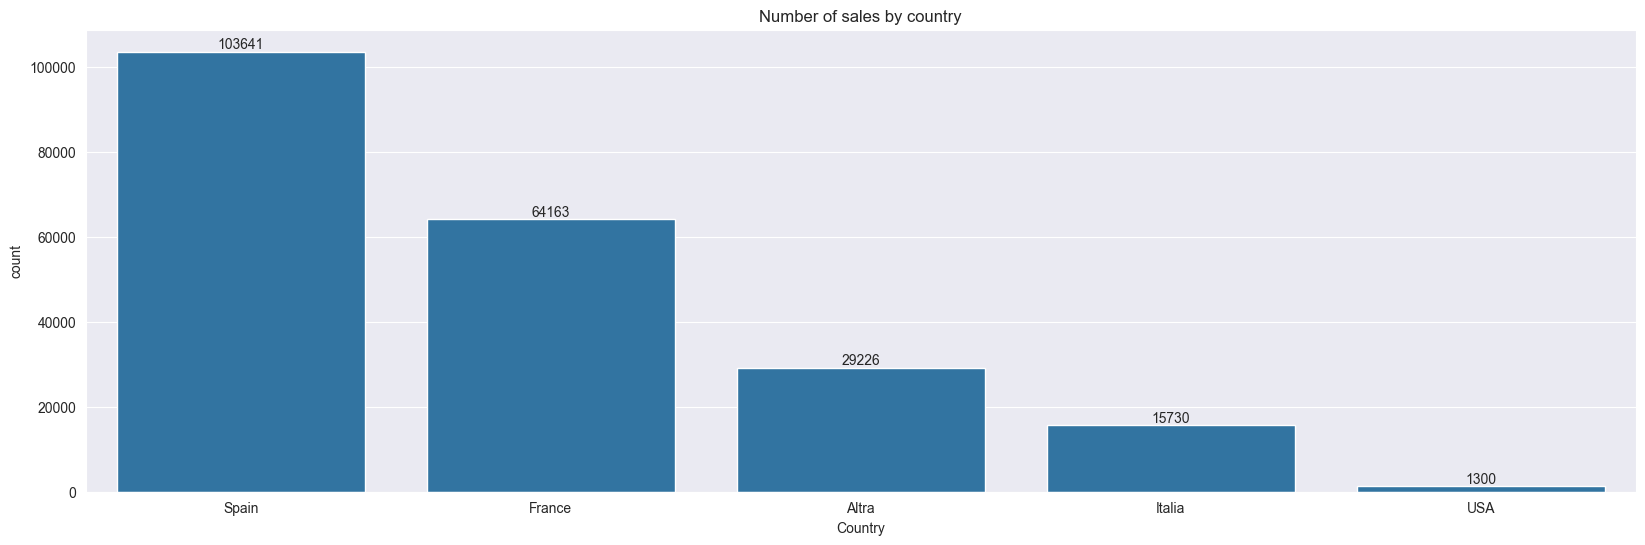

In [175]:
# Plot number of sales by country
plt.figure(figsize=(20,6))
sns.countplot(x='Country',data=cabe_sales, order=cabe_sales['Country'].value_counts().index)
for i in range(cabe_sales['Country'].nunique()):
    plt.text(i,cabe_sales['Country'].value_counts().values[i],cabe_sales['Country'].value_counts().values[i],ha='center',va='bottom')
plt.title('Number of sales by country')
plt.show()

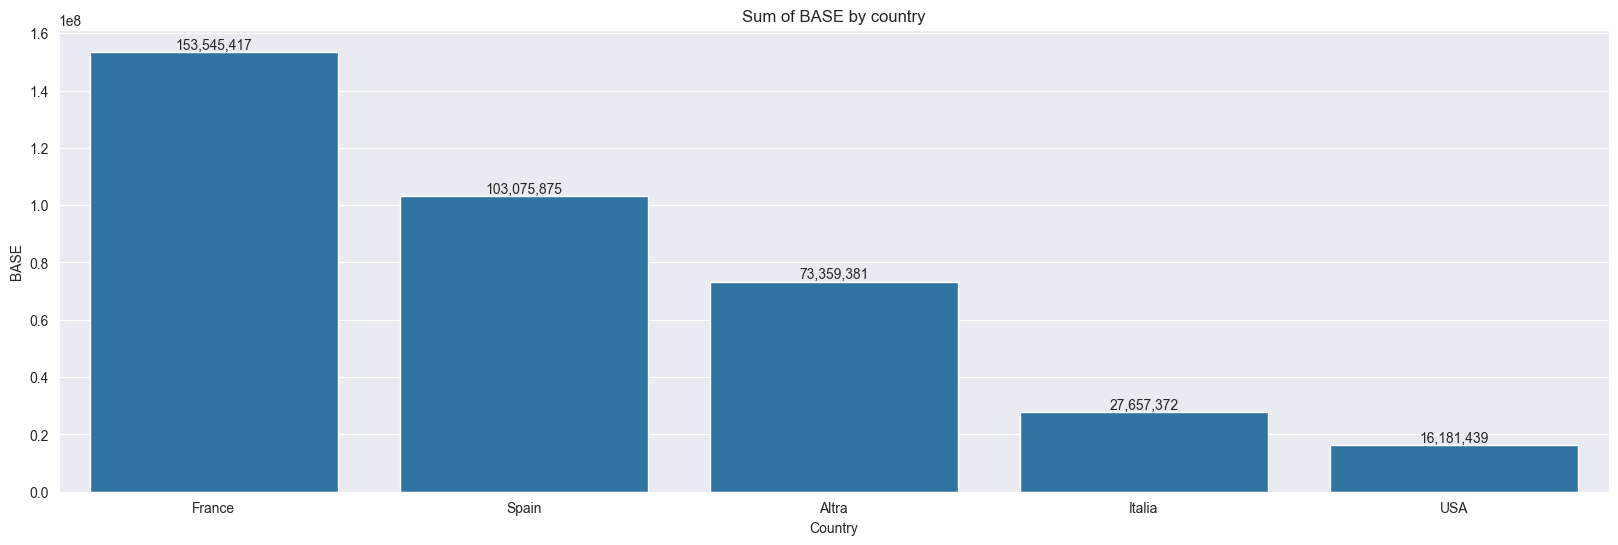

In [174]:
# Plot sum of BASE by country
sum_base = cabe_sales.groupby('Country')['BASE'].sum().sort_values(ascending=False).to_frame().reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x='Country',y='BASE',data=sum_base)
for i in range(sum_base.shape[0]):
    plt.text(i,sum_base['BASE'][i],f"{sum_base['BASE'][i]:,.0f}",ha='center',va='bottom')
plt.title('Sum of BASE by country')
plt.show()

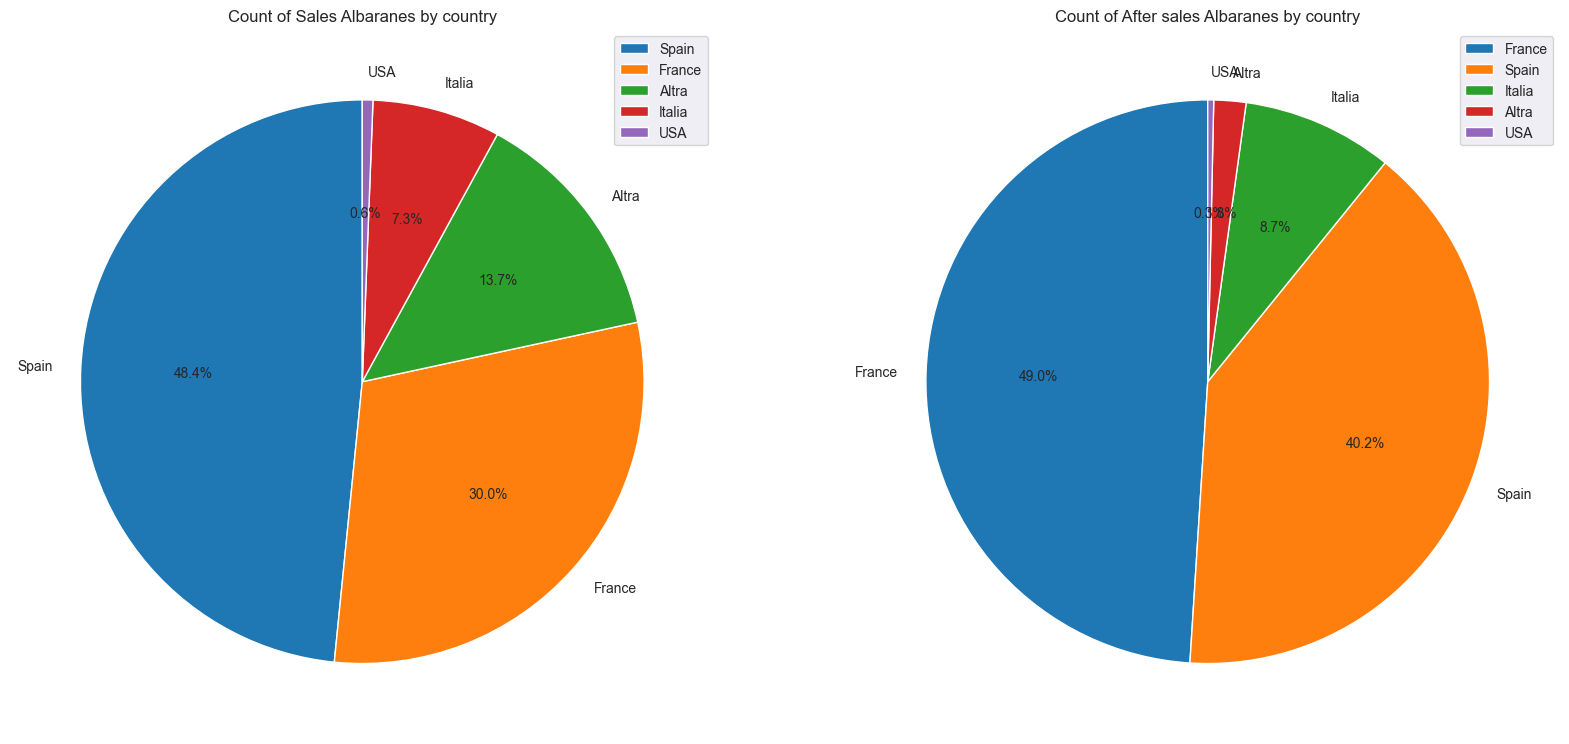

In [173]:
# Create subplot with two columns and online and Plot pie chart of sales and after sales by country
fig, ax = plt.subplots(1,2,figsize=(20,10))
cabe_sales.groupby('Country').size().sort_values(ascending=False).plot.pie(ax=ax[0],autopct='%1.1f%%', startangle=90, legend=True)
ax[0].set_title('Count of Sales Albaranes by country')
cabe_after_sales.groupby('Country').size().sort_values(ascending=False).plot.pie(ax=ax[1],autopct='%1.1f%%', startangle=90, legend=True)
ax[1].set_title('Count of After sales Albaranes by country')
plt.show()

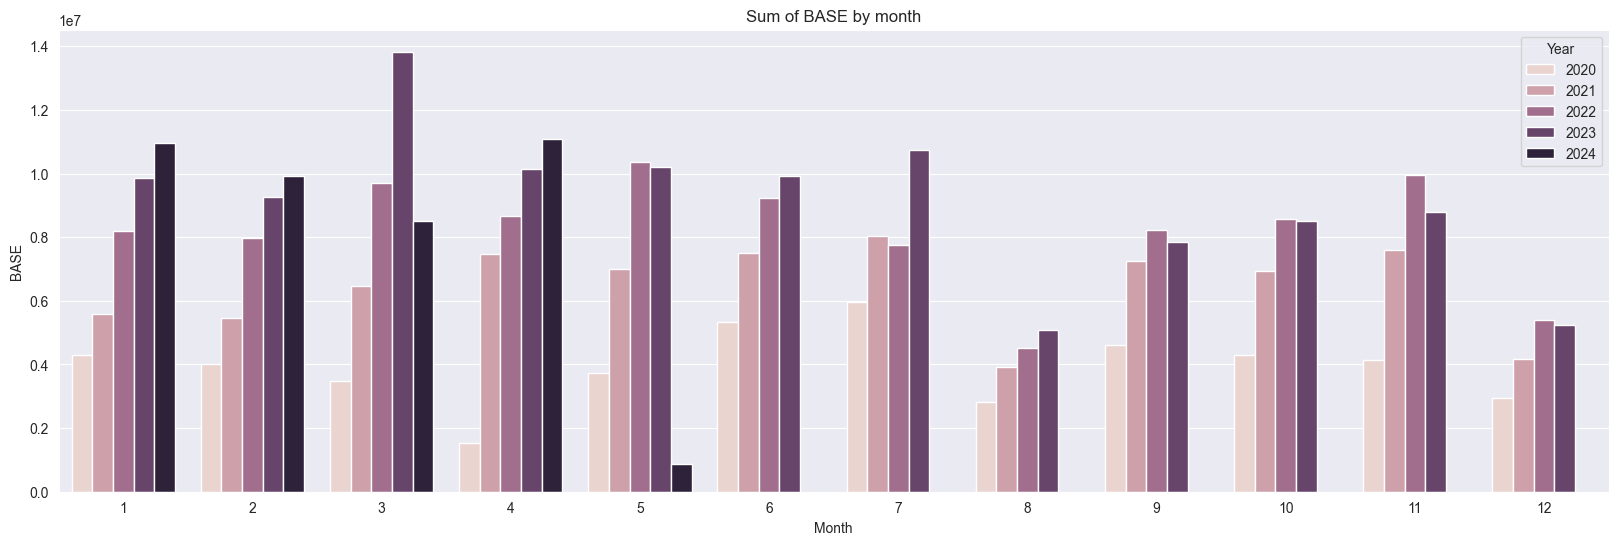

In [172]:
# Plot sum of BASE by month
sum_base_month = cabe_sales.groupby(['Year','Month'])['BASE'].sum().to_frame()
plt.figure(figsize=(20,6))
sns.barplot(x='Month',y='BASE',hue='Year',data=sum_base_month)
plt.title('Sum of BASE by month')
plt.show()

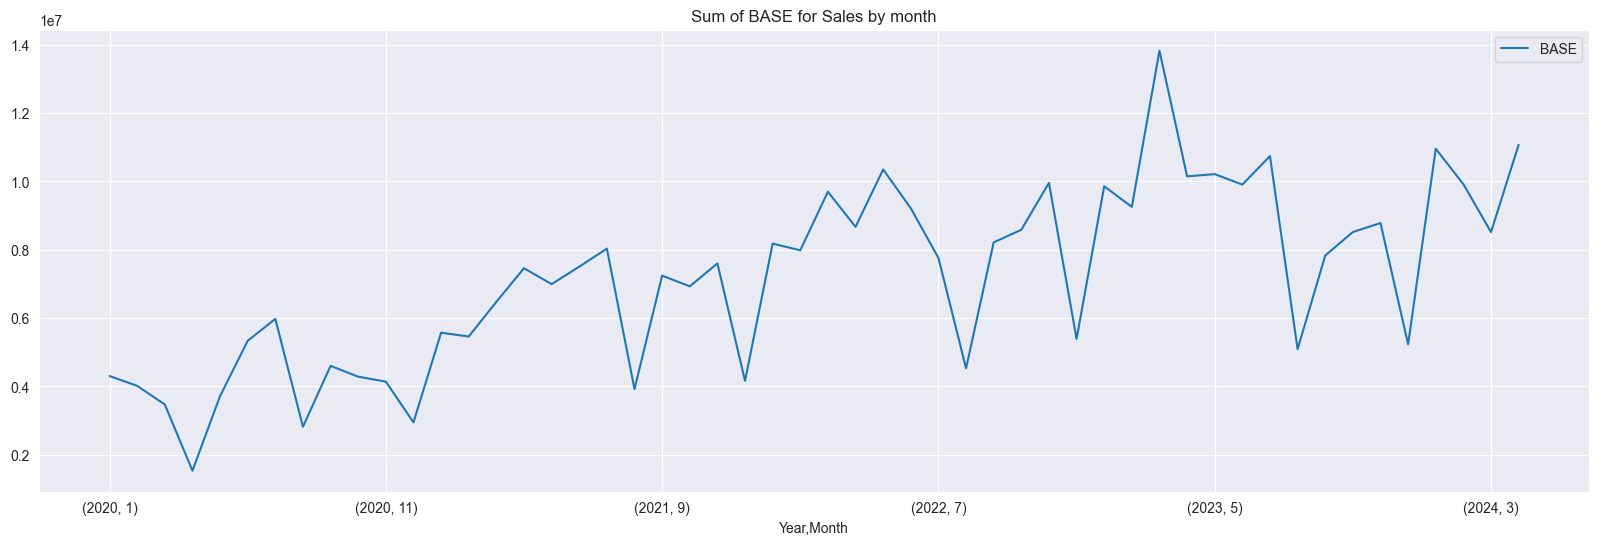

In [168]:
sum_base_month_sales = cabe_sales.groupby(['Year','Month'])['BASE'].sum().to_frame()
sum_base_month_sales[:-1].plot(figsize=(20,6))
plt.title('Sum of BASE for Sales by month')
plt.show()

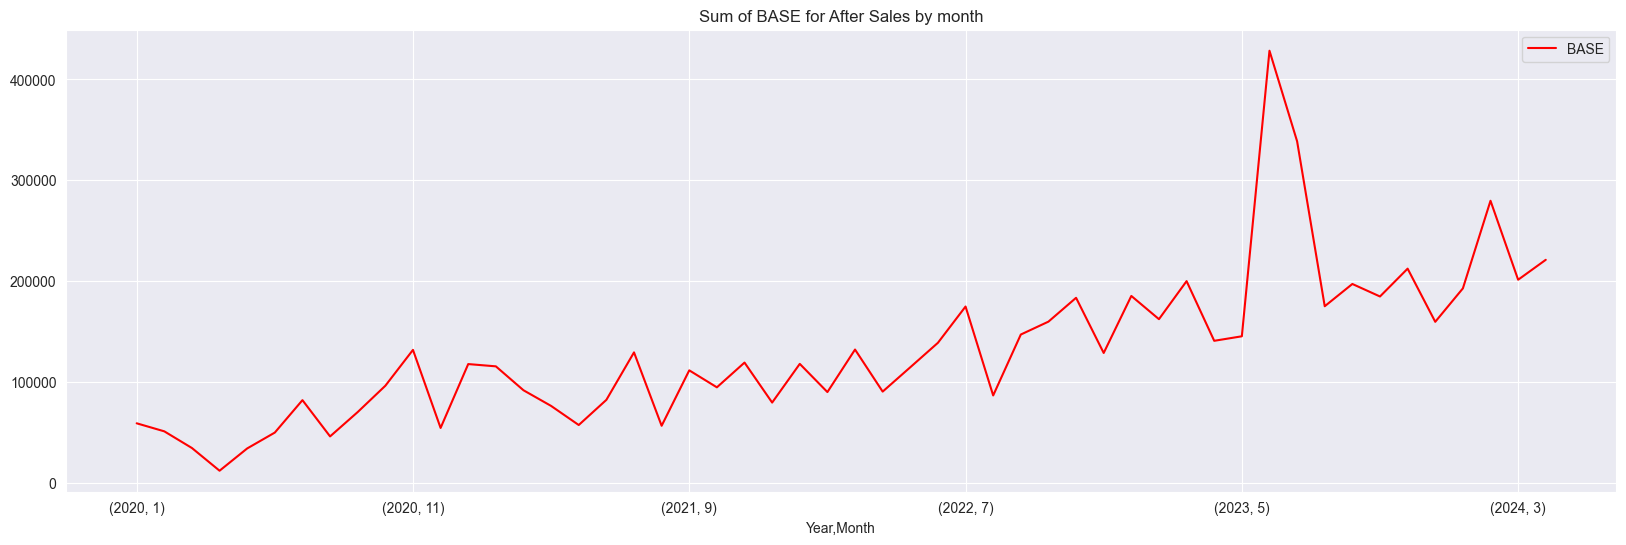

In [169]:
sum_base_month_after_sales = cabe_after_sales.groupby(['Year','Month'])['BASE'].sum().to_frame()
sum_base_month_after_sales[:-1].plot(figsize=(20,6),c='r')
plt.title('Sum of BASE for After Sales by month')
plt.show()

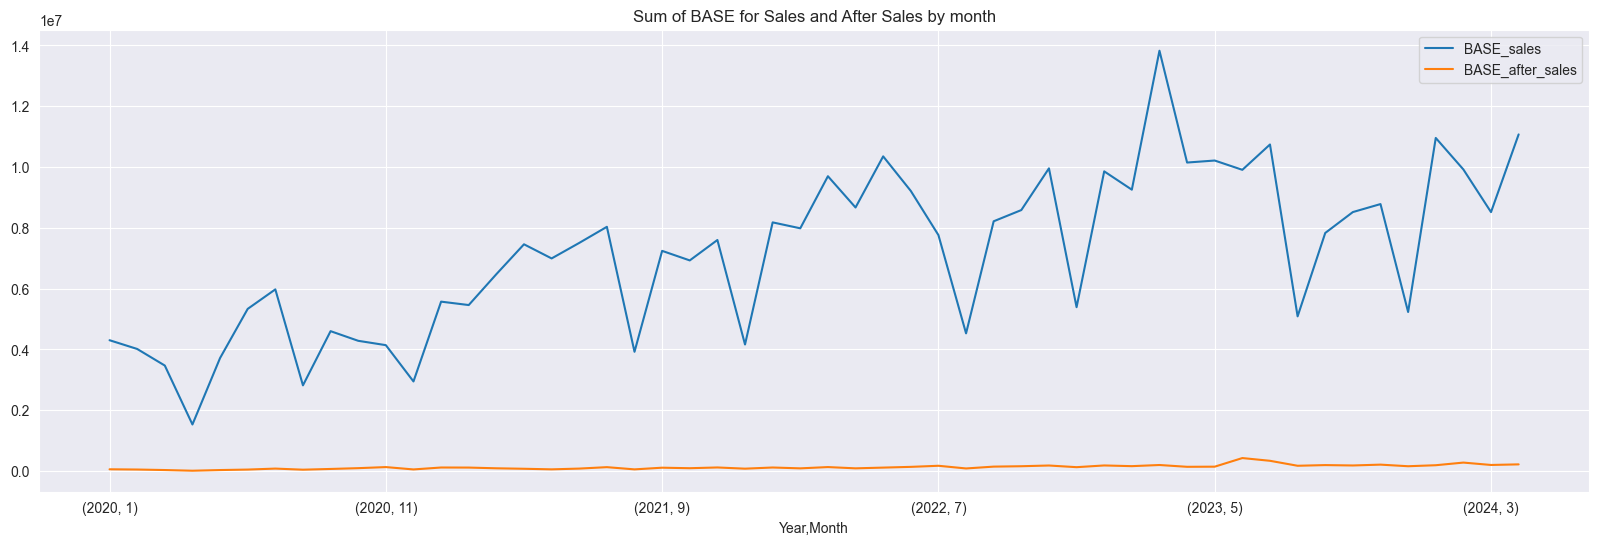

In [171]:
sum_base_month = sum_base_month_sales.merge(sum_base_month_after_sales,how='outer',on=['Year','Month'],suffixes=('_sales','_after_sales'))
sum_base_month[:-1].plot(figsize=(20,6))
plt.title('Sum of BASE for Sales and After Sales by month')
plt.show()

# Query list of errors

In [5]:
# Query data from the database
errors = query_data('SELECT * FROM dbo.AZ_ERRORES_POSTVENTA','Altra')
# Save the data to a csv file
errors.to_csv("../DATA/errors.csv",index=False,sep=';')

C:\Users\voliveira\AppData\Local\Temp\ipykernel_19096\1505274378.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


In [7]:
errors.describe(include='all')

,DESCRIPCION,ID_ERROR,TODO
count,75,75,75
unique,47,75,1
top,Sin diagnóstico - Petición TCP,1.1,F
freq,9,1,75


# Lineas's analysis

In [176]:
# Merge cabe and lineas dataframes
lineas = lineas.merge(cabe[['IDALBV','SERIE','Counutry']],on='IDALBV',how='left')

lineas_sales = lineas[lineas['SERIE'].isin(SALES_CODES)] # Filter the data to get only the sales data
lineas_after_sales = lineas[lineas['SERIE'].isin(AFTER_SALES_CODE)] # Filter the data to get only the after sales data

KeyError: 'SERIE'